<a href="https://colab.research.google.com/github/Tejasri1605/Tejasri.devtern/blob/main/Spam_mail_detection_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv (1).zip')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
data.shape

(5171, 4)

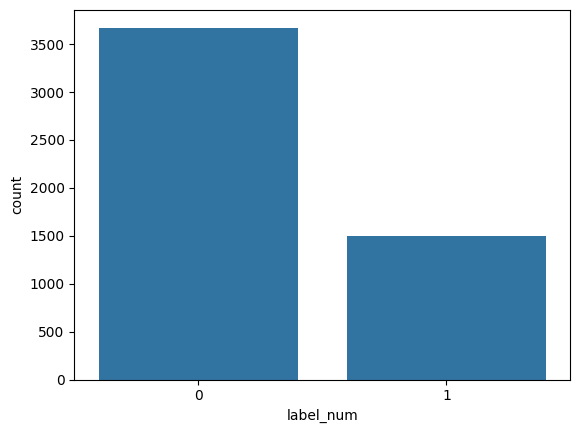

In [ ]:
sns.countplot(x="label_num",data=data)
plt.show()

Text(0.5, 0, 'Message types')

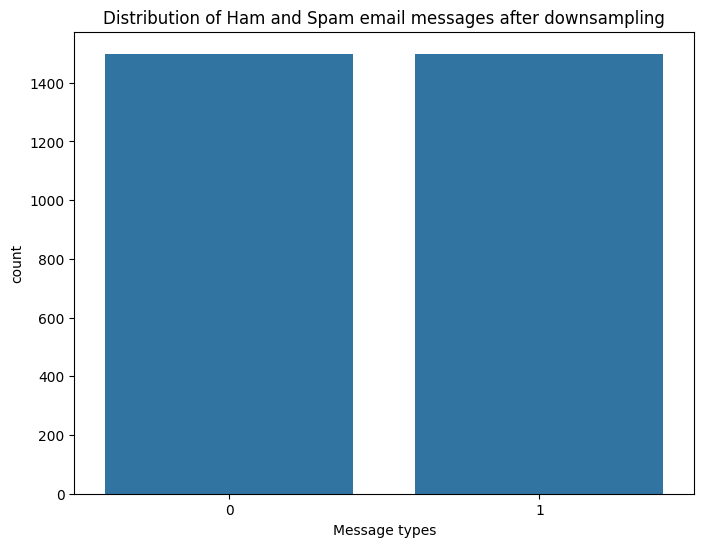

In [ ]:
# Downsampling to balance the dataset
ham_msg = data[data.label_num == 0]
spam_msg = data[data.label_num == 1]
ham_msg = ham_msg.sample(n=len(spam_msg),random_state=42)

# Plotting the counts of down sampled dataset


balanced_data = pd.concat([ham_msg,spam_msg])
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_data, x='label_num')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')

In [ ]:
balanced_data['text']=balanced_data['text'].str.replace('Subject','')
balanced_data.head()

,Unnamed: 0,label,text,label_num
2977,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
3822,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2257,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
2786,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4551,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0


In [ ]:
punctuations_list=string.punctuation
def remove_punctuation(text):
    temp=str.maketrans('','',punctuations_list)
    return text.translate(temp)

balanced_data['text']=balanced_data['text'].apply(lambda x: remove_punctuation(x))
balanced_data.head()

,Unnamed: 0,label,text,label_num
2977,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
3822,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2257,2711,ham,california energy crisis\r\ncalifornia  s p...,0
2786,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4551,1314,ham,eastrans nomination changes effective 8 2 0...,0


In [ ]:
!pip install stopwords

In [ ]:
import stopwords

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Ensure you have downloaded the stopwords corpus
nltk.download('stopwords')

# Define the stop words
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopword(text):
    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()
        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)
    return output

# Sample balanced_data DataFrame
# balanced_data = pd.DataFrame({'text': ['This is a sample text', 'Another example here']})

# Apply the function to the DataFrame
balanced_data['text'] = balanced_data['text'].apply(remove_stopword)

# Display the DataFrame
balanced_data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,label,text,label_num
2977,3444,ham,conoco big cowboy darren sure help know else a...,0
3822,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2257,2711,ham,california energy crisis california  power cr...,0
2786,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4551,1314,ham,eastrans nomination changes effective 8 2 00 p...,0


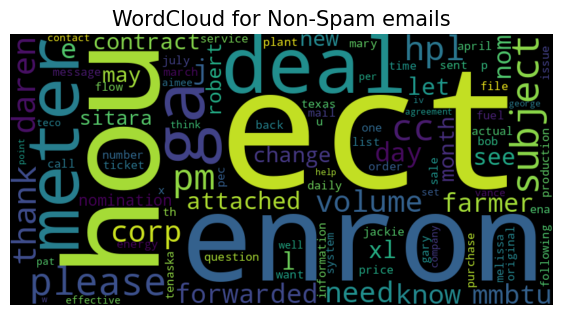

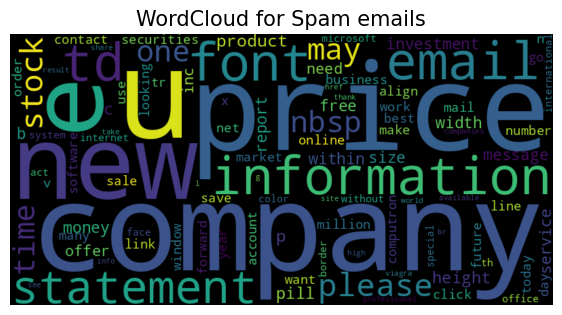

In [ ]:
def plot_word_cloud(data, typ):
	email_corpus = " ".join(data['text'])

	plt.figure(figsize=(7, 7))

	wc = WordCloud(background_color='black',
				max_words=100,
				width=800,
				height=400,
				collocations=False).generate(email_corpus)

	plt.imshow(wc, interpolation='bilinear')
	plt.title(f'WordCloud for {typ} emails', fontsize=15)
	plt.axis('off')
	plt.show()

plot_word_cloud(balanced_data[balanced_data['label_num'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label_num'] == 1], typ='Spam')

In [ ]:
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
													balanced_data['label_num'],
													test_size = 0.2,
													random_state = 42)

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100 # maximum sequence length
train_sequences = pad_sequences(train_sequences,
								maxlen=max_len,
								padding='post',
								truncating='post')
test_sequences = pad_sequences(test_sequences,
							maxlen=max_len,
							padding='post',
							truncating='post')

In [ ]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
									output_dim=32,
									input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu')) #relu is rectified linear activation unit
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           1274912   
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1278625 (4.88 MB)
Trainable params: 1278625 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy'],
            optimizer='adam')

In [ ]:
es=EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)
lr=ReduceLROnPlateau(patience=2,monitor='val_loss',factor=0.5,verbose=0)

In [ ]:
history=model.fit(train_sequences,train_Y,validation_data=(test_sequences,test_Y),epochs=20,batch_size=32,callbacks=[es,lr])

Epoch 1/20
75/75 [==============================] - 11s 104ms/step - loss: 0.6148 - accuracy: 0.6314 - val_loss: 0.2575 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 2/20
75/75 [==============================] - 5s 70ms/step - loss: 0.2229 - accuracy: 0.9412 - val_loss: 0.2080 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 3/20
75/75 [==============================] - 6s 86ms/step - loss: 0.1843 - accuracy: 0.9537 - val_loss: 0.1965 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 4/20
75/75 [==============================] - 6s 77ms/step - loss: 0.1269 - accuracy: 0.9716 - val_loss: 0.1843 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 5/20
75/75 [==============================] - 5s 68ms/step - loss: 0.1052 - accuracy: 0.9779 - val_loss: 0.1596 - val_accuracy: 0.9633 - lr: 0.0010
Epoch 6/20
75/75 [==============================] - 7s 90ms/step - loss: 0.0972 - accuracy: 0.9787 - val_loss: 0.1472 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 7/20
75/75 [==============================] - 5s 72ms/step - loss: 0

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 [==============================] - 0s 12ms/step - loss: 0.1472 - accuracy: 0.9700
Test Loss : 0.14718051254749298
Test Accuracy : 0.9700000286102295


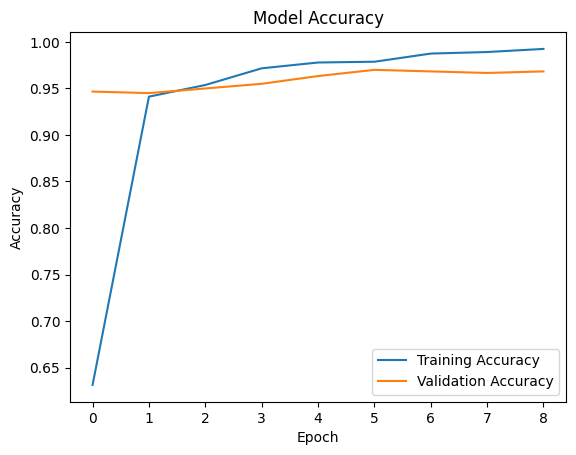

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()